In [1]:
# import denendencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# turn off warnings
import warnings
warnings.filterwarnings('ignore')
filename = f'..\Cefas_smartbuoy\clean_data.csv'


,temp,sal,ftu,fluors,o2,kd,par_0,par_1,par_2,phase
dateTime,,,,,,,,,,
2002-08-28 13:15:00,18.78,34.691,6.42,0.62,NaN,0.641,NaN,429.3,226.2,1
2002-08-28 13:30:00,18.77,34.666,6.56,0.63,NaN,0.688,NaN,475.9,239.1,1
2002-08-28 13:45:00,18.75,34.653,5.69,0.66,NaN,0.682,NaN,518.9,262.4,1
2002-08-28 14:00:00,18.75,34.635,5.50,0.69,NaN,0.720,NaN,603.9,294.0,1
2002-08-28 14:15:00,18.74,34.628,4.93,0.75,NaN,NaN,NaN,570.9,292.7,1


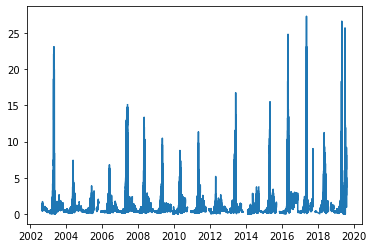

In [2]:
WGAB = pd.read_csv(filename, encoding='ANSI')
WGAB.head()
# WGAB.tail()
colours = WGAB['phase'].values
# WGAB['fluors'].plot(c = colours)

WGAB['phase']=WGAB['phase']+1 # shift phase by 1 to make it start at 1 for plotting

WGAB.index = pd.to_datetime(WGAB['dateTime'])
WGAB.drop(columns=['dateTime'], inplace=True)

plt.plot(WGAB['fluors'])

WGAB.head()

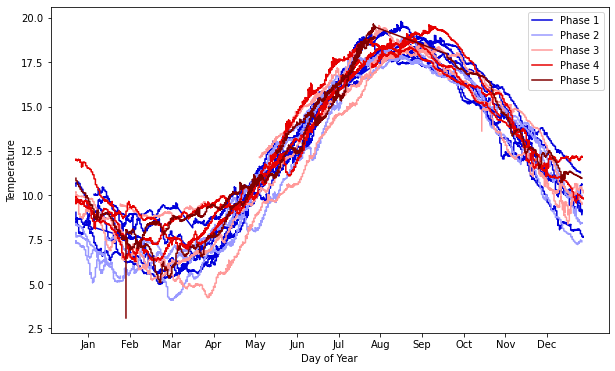

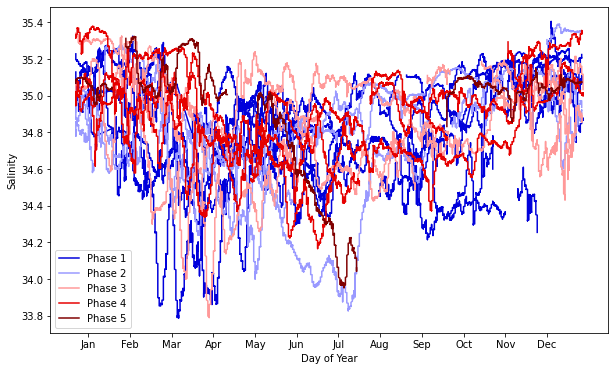

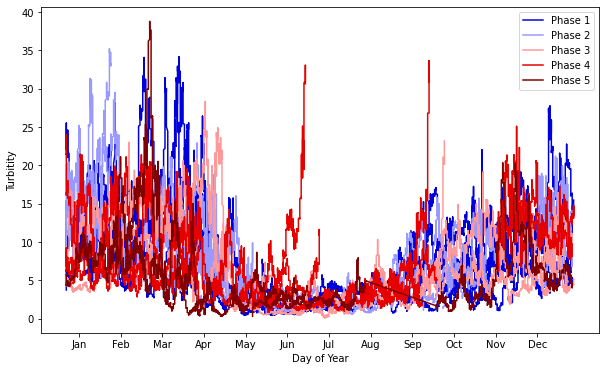

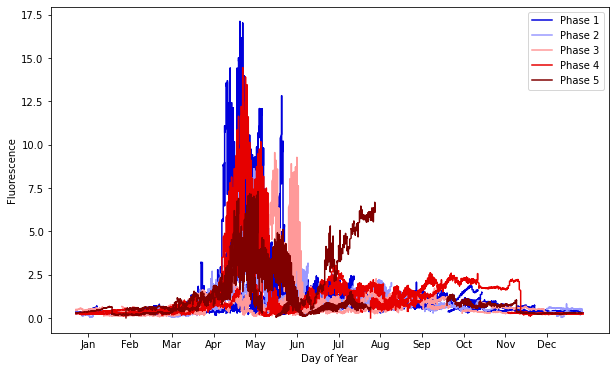

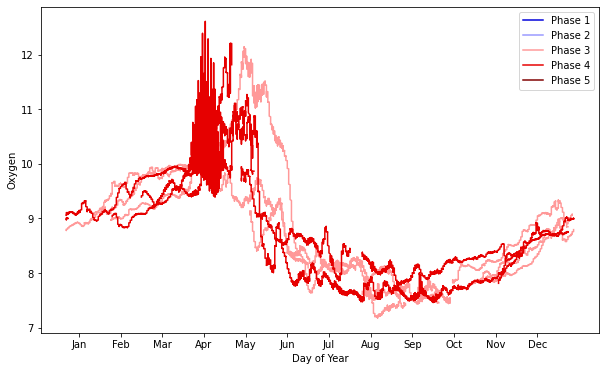

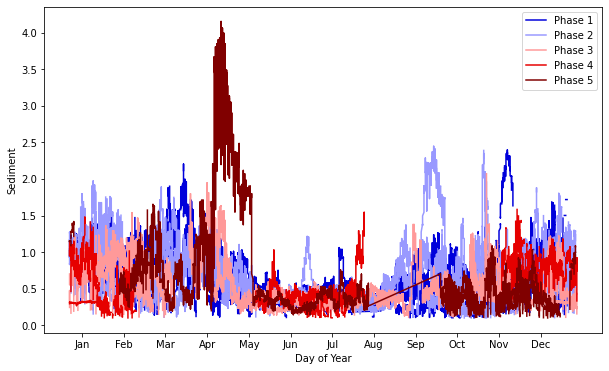

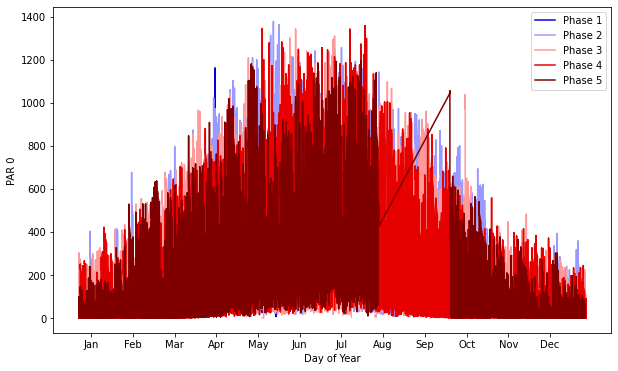

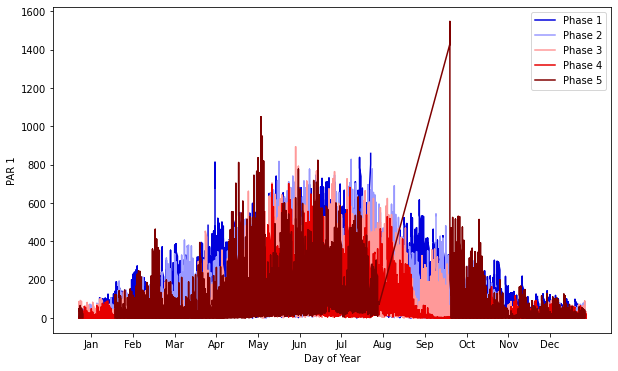

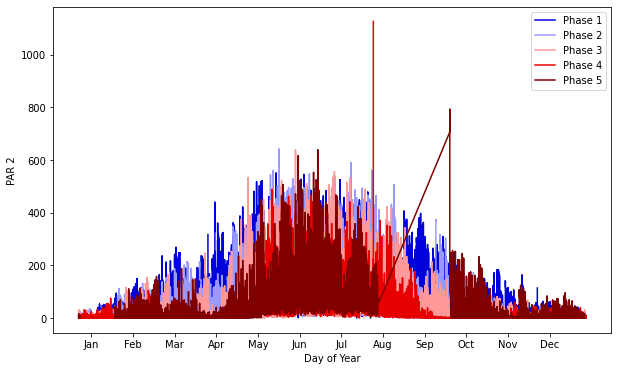

In [27]:
# split the data frame based on the years and create a new data frame for each year

years = WGAB.index.year.unique()


average_period = '24h' # hours
# create a dictionary to store the data frames
df_dict= {}
for year in years:
    df_dict[year] = WGAB.loc[str(year)]
    # iterate through the columns and create new movig average columns
    for col in df_dict[year].columns:
        df_dict[year][col+'_ma'] = df_dict[year][col].rolling('12h').mean()
    # Create day of year column
    df_dict[year]['day'] = df_dict[year].index.dayofyear

# plot the moving average data of each year
ma_col_names = [col for col in df_dict[2019].columns if 'ma' in col]

colum_Dic = {'temp_ma':'Temperature',
 'sal_ma':'Salinity',
 'ftu_ma':'Turbitity',
 'fluors_ma':'Fluorescence',
 'o2_ma':'Oxygen',
 'kd_ma':'Sediment',
 'par_0_ma':'PAR 0',
 'par_1_ma':'PAR 1',
 'par_2_ma':'PAR 2',
 'phase_ma':'Phase',}

for colm in ma_col_names[0:-1]:
    fig, ax = plt.subplots(figsize=(10, 6))
    for year in years:
        colors=cm.seismic(np.max(df_dict[year]['phase'])/np.max(WGAB['phase'].values))
        ax.plot(df_dict[year]['day'], df_dict[year][colm], c = colors, label='Phase '+ str(np.max(df_dict[year]['phase'].values)))

    ax.set_xlabel('Day of Year')
    # set the x axis in month order
    ax.set_xticks(np.arange(10, 365, 30))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_ylabel(colum_Dic[colm])

    ax.legend()
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    # fig.savefig('WGAB_'+colm+'.png', dpi=500)
    plt.show()

